In [135]:
def getFaceData(face_data, verts):
    faces_string = face_data
    faces = [x.strip() for x in faces_string.split('\n') if x.strip()][:-1]
    faces = [x.split('\t')[0].split(' ')[1] for x in faces]
    no_faces = int(faces[0])
    faces = faces[1:]
    print(faces)
    pairs_string = verts
    pairs = [int(x) for x in pairs_string.split()[1].split(',')]
    
    vertices = []
    intensities = []
    colors = []
    for i in range(0,len(faces),5):
        color = faces[i]
        colors += [color]

        index1 = int(faces[i+1].split(',')[0].strip('$'))
        index2 = int(faces[i+2].split(',')[0].strip('$'))
        index3 = int(faces[i+3].split(',')[0].strip('$'))
        vertex1 = tuple(pairs[index1*2:(index1*2)+2])
        vertex2 = tuple(pairs[index2*2:(index2*2)+2])
        vertex3 = tuple(pairs[index3*2:(index3*2)+2])
        vertices += [[vertex1,vertex2,vertex3]]

        intensity1 = faces[i+1].split(',')[1]
        intensity2 = faces[i+2].split(',')[1]
        intensity3 = faces[i+3].split(',')[1]
        intensities += [(intensity1,intensity2,intensity3)]
    return (no_faces, colors, intensities, vertices)

Had to clean up `obj2d.s` a bit. The claws are split out into a separate file.

In [136]:
data = open("obj2d_cleaned.s").read().split(":")[1:]

poly_data = []
for i in range(0,len(data),2):
    poly_data += [getFaceData(data[i],data[i+1])]

['$f0', '3,$8000', '1,$c000', '0,$ff00', '0', '$f4', '4,$4000', '2,$8000', '0,$c000', '0', '$f4', '5,$8000', '1,$c000', '0,$ff00', '0', '$f0', '6,$4000', '2,$8000', '0,$c000', '0']
['$92', '3,$f000', '0,$8000', '7,$4000', '0', '$93', '7,$f000', '4,$8000', '0,$4000', '0', '$92', '0,$f000', '1,$8000', '4,$4000', '0', '$93', '4,$f000', '5,$8000', '1,$4000', '0', '$92', '1,$f000', '2,$8000', '5,$4000', '0', '$93', '5,$f000', '6,$8000', '2,$4000', '0', '$92', '2,$f000', '3,$8000', '6,$4000', '0', '$93', '6,$f000', '7,$8000', '3,$4000', '0', '$f0', '8,$8000', '12,$c000', '14,$ff00', '0', '$30', '9,$4000', '13,$6000', '14,$8f00', '0', '$30', '10,$8000', '12,$c000', '14,$ff00', '0', '$f0', '11,$4000', '13,$6000', '14,$8f00', '0']
['$88', '$9,$8000', '$4,$4000', '0,$ffff', '0', '$88', '6,$4000', '10,$6000', '0,$ffff', '0', '$88', '12,$4000', '5,$8000', '0,$ffff', '0', '$88', '3,$8000', '11,$8000', '0,$ffff', '0', '$f0', '3,$8000', '1,$c000', '0,$ff00', '0', '$30', '4,$4000', '2,$6000', '0,$8f00

In [95]:
flatten = lambda l: [e for sublist in l for e in sublist]

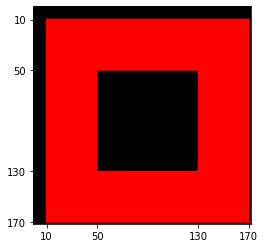

In [134]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
no_faces, colors, intensities, vertices = poly_data[31]

# Scale the vertices up * 10 so we get a decent size image.
scaled_vertices = [
    [(x*10,y*10) for (x,y) in verts]
    for verts in vertices
]

# Get the xs and ys so we can use them in our dimensions

xs = [x for (x,y) in flatten(scaled_vertices)]
ys = [y for (x,y) in flatten(scaled_vertices)]

im = Image.new('RGB', (max(xs)+2, max(ys)+2))
draw = ImageDraw.Draw(im)

for vertex in scaled_vertices:
    draw.polygon(vertex, fill = (255,0,0))
fig, ax = plt.subplots()
ax.imshow(im)

# Only use the vertices for ticks in our graph
plt.xticks(list(sorted(set(xs))))
plt.yticks(list(sorted(set(ys))))
plt.show()